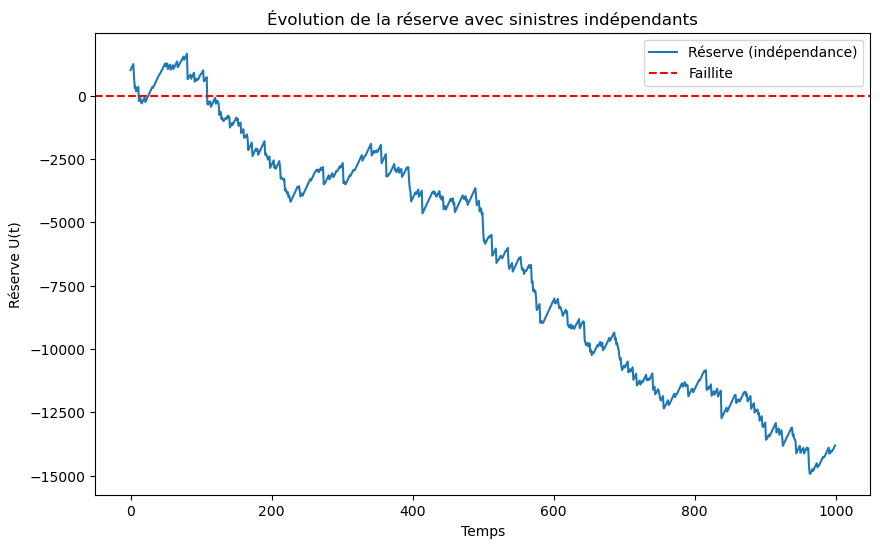

In [237]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle
u = 1000  # Réserve initiale
c = 60    # Taux de primes perçues
lambda_poisson = 0.4  # Taux du processus de Poisson
mu_claim = 200        # Espérance des montants des sinistres

# Simulation
T = 1000  # Horizon temporel
time_steps = np.arange(T)

# Génération d'un processus de Poisson pour les temps d'événements
num_claims = np.random.poisson(lambda_poisson * T)  # Nombre total de sinistres
claim_times = np.sort(np.random.uniform(0, T, num_claims))  # Temps des sinistres

# Génération des montants des sinistres (indépendants)
claim_sizes = np.random.exponential(mu_claim, num_claims)

# Calcul de S(t)
S_t = np.zeros_like(time_steps, dtype=float)
for t in time_steps:
    S_t[t] = claim_sizes[claim_times <= t].sum()

# Calcul de U(t)
U_t = u + c * time_steps - S_t

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(time_steps, U_t, label="Réserve (indépendance)")
plt.axhline(0, color='r', linestyle='--', label="Faillite")
plt.xlabel("Temps")
plt.ylabel("Réserve U(t)")
plt.legend()
plt.title("Évolution de la réserve avec sinistres indépendants")
plt.show()

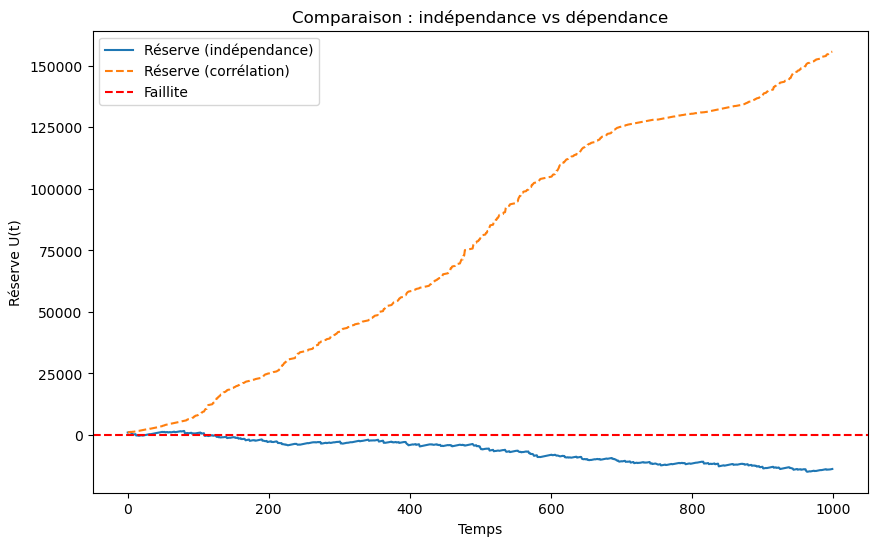

In [238]:
# Génération de montants corrélés avec un processus AR(1)
phi = 1  # Coefficient de corrélation
sigma = 50  # Écart-type du bruit

# Processus AR(1) pour les montants des sinistres
claim_sizes_correlated = np.zeros(num_claims)
claim_sizes_correlated[0] = np.random.exponential(mu_claim)
for i in range(1, num_claims):
    claim_sizes_correlated[i] = phi * claim_sizes_correlated[i-1] + np.random.normal(0, sigma)

# Calcul de S(t) avec dépendances
S_t_correlated = np.zeros_like(time_steps, dtype=float)
for t in time_steps:
    S_t_correlated[t] = claim_sizes_correlated[claim_times <= t].sum()

# Calcul de U(t)
U_t_correlated = u + c * time_steps - S_t_correlated

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(time_steps, U_t, label="Réserve (indépendance)")
plt.plot(time_steps, U_t_correlated, label="Réserve (corrélation)", linestyle='--')
plt.axhline(0, color='r', linestyle='--', label="Faillite")
plt.xlabel("Temps")
plt.ylabel("Réserve U(t)")
plt.legend()
plt.title("Comparaison : indépendance vs dépendance")
plt.show()


In [44]:
T

1000

In [231]:
T = 1000
M = 1

n = np.random.poisson(M*T)

1032

In [241]:
np.random.poisson(M*T)

940

In [239]:
compte = 0
liste_compte = [compte]
mu = 0.6

alpha = 0.1
beta = 1

for i in range(n):
    if np.random.uniform(0,1) < mu:
        for j in range(i, len(time_steps)):
            u = j - i
            if np.random.uniform(0,1) < mu + alpha*np.exp(-beta*u):
                compte+=1
    liste_compte.append(compte)

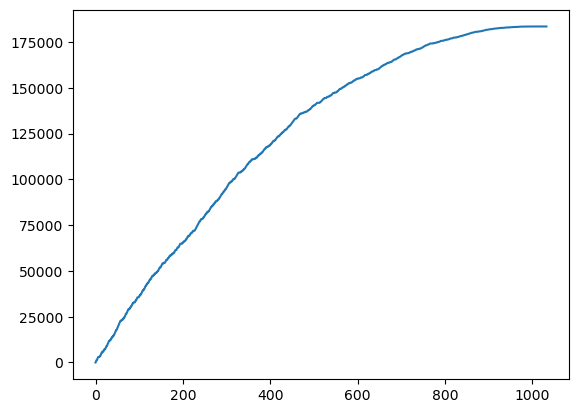

In [240]:
plt.plot(liste_compte)